In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import svm
from sklearn import linear_model
import xgboost as xgb
import matplotlib.ticker
from sklearn import metrics
from sklearn import preprocessing

from sklearn.metrics import make_scorer, r2_score, explained_variance_score, mean_absolute_error, mean_squared_error 
matplotlib.rcParams.update({'font.size': 16})

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

pd.options.display.max_columns = 100

In [8]:
df = pd.read_csv('data/US/counties.csv')
df.dropna(how = 'any', inplace = True)
df.reset_index(inplace = True)
df = df.drop(columns = df.columns[0], axis = 1)

In [9]:
df = df.sort_values(by=['median-household-income'])

In [10]:
df.columns

Index(['GEOID', 'year', 'name', 'parent-location', 'population',
       'poverty-rate', 'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed'],
      dtype='object')

In [11]:
df.corr()

,GEOID,year,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
GEOID,1.000000,0.003096,-0.057100,-0.058915,-0.050930,-0.023736,0.014574,0.047370,-0.017712,-0.058168,0.009741,-0.111423,0.099563,0.036574,-0.057886,-0.024167,0.043160,-0.031276,-0.012175,-0.038487,0.054760,0.027132,0.005927,-0.014111,0.095841
year,0.003096,1.000000,0.017219,-0.112198,0.017823,0.122181,0.505771,0.363246,0.230735,0.404409,-0.066557,0.017914,0.051497,-0.012895,0.064689,-0.004404,0.179310,0.029720,0.012158,0.004815,0.019154,0.045211,0.027587,0.006324,0.089349
population,-0.057100,0.017219,1.000000,-0.051240,0.978059,0.311933,0.341752,0.234507,0.337167,0.153160,-0.237596,0.084622,0.176332,-0.038129,0.478421,0.029744,0.084277,0.219127,0.609608,0.789165,0.176294,0.197094,0.087780,0.022535,0.036704
poverty-rate,-0.058915,-0.112198,-0.051240,1.000000,-0.017370,0.222576,-0.407850,-0.706323,-0.405579,0.199246,-0.472065,0.447762,0.169735,0.167270,-0.143561,0.029803,-0.037627,-0.042913,0.003284,-0.007620,-0.045904,-0.021793,-0.046664,-0.007278,-0.080212
renter-occupied-households,-0.050930,0.017823,0.978059,-0.017370,1.000000,0.351482,0.299890,0.179378,0.325013,0.139144,-0.237897,0.093518,0.169022,-0.033763,0.460732,0.027878,0.080735,0.215483,0.640362,0.778276,0.145273,0.174224,0.075783,0.017644,0.024959
pct-renter-occupied,-0.023736,0.122181,0.311933,0.222576,0.351482,1.000000,0.284863,-0.012323,0.233389,0.283018,-0.423623,0.256233,0.230977,0.030802,0.402314,0.145547,0.196832,0.271765,0.343492,0.338336,0.219271,0.261866,0.146073,0.040602,-0.010406
median-gross-rent,0.014574,0.505771,0.341752,-0.407850,0.299890,0.284863,1.000000,0.799300,0.809776,0.453292,-0.189740,0.033403,0.148503,-0.075895,0.526136,0.062434,0.235365,0.311908,0.252374,0.258778,0.278128,0.321068,0.197722,0.047883,0.068842
median-household-income,0.047370,0.363246,0.234507,-0.706323,0.179378,-0.012323,0.799300,1.000000,0.709746,0.078794,0.081094,-0.193336,0.038610,-0.094396,0.421742,0.009583,0.133518,0.199021,0.145875,0.146730,0.167054,0.196608,0.126262,0.030169,0.075727
median-property-value,-0.017712,0.230735,0.337167,-0.405579,0.325013,0.233389,0.809776,0.709746,1.000000,0.304134,-0.065413,-0.064652,0.064427,-0.046752,0.560823,0.067496,0.178481,0.319977,0.233840,0.206676,0.141425,0.188387,0.183263,0.035459,0.039680
rent-burden,-0.058168,0.404409,0.153160,0.199246,0.139144,0.283018,0.453292,0.078794,0.304134,1.000000,-0.226588,0.269147,0.014712,-0.071395,0.186926,0.003603,0.145630,0.158081,0.119998,0.140640,0.224651,0.228142,0.141628,0.042826,0.050427


In [12]:
df.iplot(
    x='median-household-income',
    y='eviction-filing-rate',
    #kind='hist',
    xTitle='Median Household Income',
    yTitle='Eviction Rate',
    title='Income Affecting Eviction')

In [13]:
#TODO: normalize df

In [14]:
X = df.drop(['eviction-filing-rate','eviction-filings','eviction-rate','evictions',
            'name','parent-location','low-flag','imputed','subbed'], axis=1)
y = df['eviction-filing-rate']

#Normalize variables
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

/Users/marcloeffke/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [15]:
X_scaled

,GEOID,year,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other
0,0.254415,0.2500,0.000008,0.884531,0.000051,1.000000,0.210431,0.000000,0.000000,0.220096,0.201668,0.000000,0.042642,0.000000,0.375829,1.000000,0.260536,0.416327
1,0.254415,0.0000,0.000008,0.884531,0.000061,1.000000,0.210431,0.000000,0.000000,0.220096,0.201668,0.000000,0.042642,0.000000,0.375829,1.000000,0.260536,0.416327
2,0.254415,0.1875,0.000008,0.884531,0.000054,1.000000,0.210431,0.000000,0.000000,0.220096,0.201668,0.000000,0.042642,0.000000,0.375829,1.000000,0.260536,0.416327
3,0.254415,0.1250,0.000008,0.884531,0.000056,1.000000,0.210431,0.000000,0.000000,0.220096,0.201668,0.000000,0.042642,0.000000,0.375829,1.000000,0.260536,0.416327
4,0.254415,0.0625,0.000008,0.884531,0.000059,1.000000,0.210431,0.000000,0.000000,0.220096,0.201668,0.000000,0.042642,0.000000,0.375829,1.000000,0.260536,0.416327
5,0.366761,0.0000,0.000477,1.000000,0.000225,0.153157,0.059430,0.056712,0.040800,0.569378,0.984558,0.001153,0.007525,0.000706,0.000884,0.000414,0.022989,0.004082
6,0.366761,0.0625,0.000477,1.000000,0.000231,0.153157,0.059430,0.056712,0.040800,0.569378,0.984558,0.001153,0.007525,0.000706,0.000884,0.000414,0.022989,0.004082
7,0.366761,0.1250,0.000477,1.000000,0.000237,0.153157,0.059430,0.056712,0.040800,0.569378,0.984558,0.001153,0.007525,0.000706,0.000884,0.000414,0.022989,0.004082
8,0.366761,0.2500,0.000477,1.000000,0.000249,0.153157,0.059430,0.056712,0.040800,0.569378,0.984558,0.001153,0.007525,0.000706,0.000884,0.000414,0.022989,0.004082
9,0.366761,0.1875,0.000477,1.000000,0.000243,0.153157,0.059430,0.056712,0.040800,0.569378,0.984558,0.001153,0.007525,0.000706,0.000884,0.000414,0.022989,0.004082


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [17]:
xg_reg = xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE = %f' % rmse)

RMSE = 4.471512


In [19]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
         'max_depth':5, 'alpha':10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                   num_boost_round=50, early_stopping_rounds=10, metrics ='rmse', as_pandas=True, seed=123)

[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:26:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[13:26:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_

In [20]:
print(cv_results['test-rmse-mean'].tail(1))

49    2.709357
Name: test-rmse-mean, dtype: float64


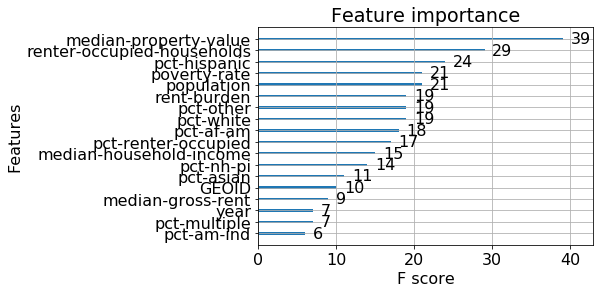

In [21]:
xgb.plot_importance(xg_reg)

In [22]:
corr = X_scaled.corr()

In [23]:
corr

,GEOID,year,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other
GEOID,1.000000,0.003096,-0.057100,-0.058915,-0.050930,-0.023736,0.014574,0.047370,-0.017712,-0.058168,0.009741,-0.111423,0.099563,0.036574,-0.057886,-0.024167,0.043160,-0.031276
year,0.003096,1.000000,0.017219,-0.112198,0.017823,0.122181,0.505771,0.363246,0.230735,0.404409,-0.066557,0.017914,0.051497,-0.012895,0.064689,-0.004404,0.179310,0.029720
population,-0.057100,0.017219,1.000000,-0.051240,0.978059,0.311933,0.341752,0.234507,0.337167,0.153160,-0.237596,0.084622,0.176332,-0.038129,0.478421,0.029744,0.084277,0.219127
poverty-rate,-0.058915,-0.112198,-0.051240,1.000000,-0.017370,0.222576,-0.407850,-0.706323,-0.405579,0.199246,-0.472065,0.447762,0.169735,0.167270,-0.143561,0.029803,-0.037627,-0.042913
renter-occupied-households,-0.050930,0.017823,0.978059,-0.017370,1.000000,0.351482,0.299890,0.179378,0.325013,0.139144,-0.237897,0.093518,0.169022,-0.033763,0.460732,0.027878,0.080735,0.215483
pct-renter-occupied,-0.023736,0.122181,0.311933,0.222576,0.351482,1.000000,0.284863,-0.012323,0.233389,0.283018,-0.423623,0.256233,0.230977,0.030802,0.402314,0.145547,0.196832,0.271765
median-gross-rent,0.014574,0.505771,0.341752,-0.407850,0.299890,0.284863,1.000000,0.799300,0.809776,0.453292,-0.189740,0.033403,0.148503,-0.075895,0.526136,0.062434,0.235365,0.311908
median-household-income,0.047370,0.363246,0.234507,-0.706323,0.179378,-0.012323,0.799300,1.000000,0.709746,0.078794,0.081094,-0.193336,0.038610,-0.094396,0.421742,0.009583,0.133518,0.199021
median-property-value,-0.017712,0.230735,0.337167,-0.405579,0.325013,0.233389,0.809776,0.709746,1.000000,0.304134,-0.065413,-0.064652,0.064427,-0.046752,0.560823,0.067496,0.178481,0.319977
rent-burden,-0.058168,0.404409,0.153160,0.199246,0.139144,0.283018,0.453292,0.078794,0.304134,1.000000,-0.226588,0.269147,0.014712,-0.071395,0.186926,0.003603,0.145630,0.158081


In [24]:
corr.iplot(kind='heatmap', colorscale='spectral')

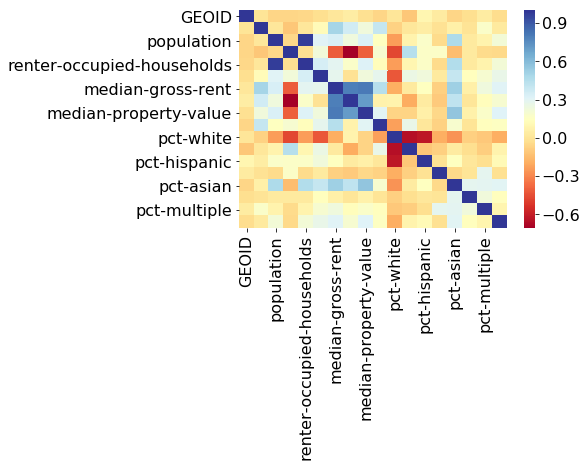

In [25]:
sns.heatmap(corr, cmap='RdYlBu')